In [1]:
# import libraries
import requests
import json
import os
import re
from impo.impo import imp_inst as imp 
import datetime

imp.import_or_install('flask')
imp.import_or_install('pandas')
from flask import Flask, request, render_template, redirect, url_for, Markup
import pandas as pd
from lstm.lstm import Lstm

flask is already installed
pandas is already installed
pandas is already installed
scikit-learn is not installed, installing now...
scikit-learn has been installed
numpy is already installed
tensorflow is already installed
keras is already installed
matplotlib is already installed
plotly is already installed


In [2]:
model_html = """
            <div class="work">
              <h2>Selected work</h2>
              <div class="work--lockup">
                <ul class="slider">
                  <li class="slider--item slider--item-left">
                    <a href="#0">
                      <div class="slider--item-image">
                        <img src="{{ url_for('static', filename='img/work-victory.jpg') }}" alt="Victory">
                      </div>
                      <p class="slider--item-title">Victory</p>
                      <p class="slider--item-description">Lorem ipsum dolor sit amet, consectetur adipisicing elit sed do.</p>
                    </a>
                  </li>
                  <li class="slider--item slider--item-center">
                    <a href="#0">
                      <div class="slider--item-image">
                        <img src="{{ url_for('static', filename='img/work-metiew-smith.jpg') }}" alt="Metiew and Smith">
                      </div>
                      <p class="slider--item-title">Metiew &amp; Smith</p>
                      <p class="slider--item-description">Lorem ipsum dolor sit amet, consectetur adipisicing elit sed do.</p>
                    </a>
                  </li>

                  <li class="slider--item slider--item-right">
                    <a href="#0">
                      <div class="slider--item-image">
                        <img src="{{ url_for('static', filename='img/work-alex-nowak.jpg') }}" alt="Alex Nowak">
                      </div>
                      <p class="slider--item-title">Alex Nowak</p>
                      <p class="slider--item-description">Lorem ipsum dolor sit amet, consectetur adipisicing elit sed do.</p>
                    </a>
                  </li>
                </ul>

                <div class="slider--prev">
                  <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"
                  viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                  <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                    <path d="M561,1169C525,1155,10,640,3,612c-3-13,1-36,8-52c8-15,134-145,281-289C527,41,562,10,590,10c22,0,41,9,61,29
                    c55,55,49,64-163,278L296,510h575c564,0,576,0,597,20c46,43,37,109-18,137c-19,10-159,13-590,13l-565,1l182,180
                    c101,99,187,188,193,199c16,30,12,57-12,84C631,1174,595,1183,561,1169z"/>
                  </g>
                  </svg>
                </div>

                <div class="slider--next">
                  <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                  <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                    <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                  </g>
                  </svg>
                </div>
              </div>
            </div>
          """

In [3]:
predictions_html = """
<!DOCTYPE html>
<html lang="en">
<head>
  <title>Global</title>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="description" content="HTML5 website template">
  <meta name="keywords" content="global, template, html, sass, jquery">
  <meta name="author" content="Bucky Maler">
  <link rel="stylesheet" href="{{ url_for('static', filename='css/main.css') }}">
</head>
<body>

<!-- notification for small viewports and landscape oriented smartphones -->
<div class="device-notification">
  <a class="device-notification--logo" href="#0">
    <img src="{{ url_for('static', filename='img/logo.png') }}" alt="Global">
    <p>Global</p>
  </a>
  <p class="device-notification--message">Global has so much to offer that we must request you orient your device to portrait or find a larger screen. You won't be disappointed.</p>
</div>

<div class="perspective effect-rotate-left">
  <div class="container"><div class="outer-nav--return"></div>
    <div id="viewport" class="l-viewport">
      <div class="l-wrapper">
        <header class="header">
          <a class="header--logo" href="#0">
            <img src="{{ url_for('static', filename='img/logo.png') }}" alt="Global">
            <p>Global</p>
          </a>
          <button class="header--cta cta">Hire Us</button>
          <div class="header--nav-toggle">
            <span></span>
          </div>
        </header>
        <nav class="l-side-nav">
          <ul class="side-nav">
            <li class="is-active"><span>Home</span></li>
            <li class="is-active"><span>Predictions</span></li>
          </ul>
        </nav>
        <ul class="l-main-content main-content">
          <li class="l-section section section--is-active">
            <div class="intro">
              <div class="intro--banner">
                <h1>Predict<br>Stocks</h1>
                <button class="cta">Predict
                  <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                  <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                    <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                  </g>
                  </svg>
                  <span class="btn-background"></span>
                </button>
                <img src="{{ url_for('static', filename='img/introduction-visual.png') }}" alt="Welcome">
              </div>

              <form method="POST" action="/demo">
                <label for="stock-name">Stocks:</label>
                    <input type="text" id="stock-search" placeholder="Search stocks">
                    <div id="stock-checkboxes">
                        
                            <label>
                                <input type="checkbox" name="stock-name" value="MSFT">
                                Microsoft
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="JNJ">
                                Johnson & Johnson
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="INTC">
                                Intel Corporation
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="BA">
                                Boeing Co
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="UNH">
                                UnitedHealth Group Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="JPM">
                                JPMorgan Chase & Co
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="V">
                                Visa Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="PG">
                                Procter & Gamble Co
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="HD">
                                Home Depot Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="CVX">
                                Chevron Corp
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="MRK">
                                Merck & Co Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="KO">
                                Coca-Cola Co
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="CSCO">
                                Cisco Systems Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="MCD">
                                McDonald's Corp
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="WMT">
                                Walmart Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="CRM">
                                Salesforce.com Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="DIS">
                                The Walt Disney Co
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="VZ">
                                Verizon Communications Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="NKE">
                                Nike Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="AAPL">
                                Apple Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="IBM">
                                International Business Machines Corp
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="GS">
                                Goldman Sachs Group Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="HON">
                                Honeywell International Inc
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="AXP">
                                American Express Co
                            </label>
                            <label>
                                <input type="checkbox" name="stock-name" value="AMGN">
                                Amgen, Inc.
                            </label>

                            <!-- <button class="cta">Predict
                                <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                                <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                                <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                                </g>
                                </svg>
                                <span class="btn-background"></span>
                            </button> -->
                        </div>


                        <label for="time-name" style="margin-bottom: 0px;">Time range predictions:</label>
                        <!-- <input type="text" id="source-search" placeholder="Select the source"> -->
                        <div id="time-checkboxes" style="margin-top: 0px; margin-bottom: 10px;">
                            
                                <label>
                                    <input type="radio" name="time-name" value="3">
                                    3 Months
                                </label>
                                <label>
                                    <input type="radio" name="time-name" value="6">
                                    6 Months
                                </label>
                                

                                <!-- <button class="cta">Predict
                                    <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                                    <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                                    <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                                    </g>
                                    </svg>
                                    <span class="btn-background"></span>
                                </button> -->
                            </div>

                            <!-- <label for="model-name" style="margin-bottom: 10px;">Models:</label>
                            <div id="model-checkboxes" style="margin-top: 0px; margin-bottom: 10px;">
                                
                                    <label>
                                        <input type="checkbox" name="model-name" value="Model 1">
                                        Model 1
                                    </label>
                                    <label>
                                        <input type="checkbox" name="model-name" value="Model 2">
                                        Model 2
                                    </label>
                                    <label>
                                        <input type="checkbox" name="model-name" value="Model 3">
                                        Model 3
                                    </label>
                                    <label>
                                        <input type="checkbox" name="model-name" value="Model 4">
                                        Model 4
                                    </label> -->
                                    
    
                                    <!-- <button class="cta">Predict
                                        <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                                        <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                                        <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                                        </g>
                                        </svg>
                                        <span class="btn-background"></span>
                                    </button> -->
                                <!-- </div> -->
                               <div>
                                <label for="model-name-toggle" style="margin-bottom: 10px;">Models:</label>
                            </div>
                                <label class="switch">
                                    <input type="checkbox" id="model-name-toggle" name="model-name-toggle">
                                    <span class="slider"></span>
                                </label>
                                <div id="model-bars" style="margin-top: 0px; margin-bottom: 20px; display: none;">
                                    <label for="model-1">Number of LSTM Layers:</label>
                                    <input type="range" id="model-1" name="model-1" min="2" max="100" value="6">
                                    <span id="model-1-value">6</span><br>
                                    
                                    <label for="model-2">Learning Rate:</label>
                                    <input type="range" id="model-2" name="model-2" min="0.001" max="0.1" value="0.01" step="0.001">
                                    <span id="model-2-value">0.01</span><br>
                                    
                                    <label for="model-3">Early Stopping:</label>
                                    <input type="range" id="model-3" name="model-3" min="10" max="500" value="200">
                                    <span id="model-3-value">200</span><br>
                                    
                                    <label for="model-4">Number of Epochs:</label>
                                    <input type="range" id="model-4" name="model-4" min="500" max="5000" value="2000">
                                    <span id="model-4-value">2000</span><br>
                                </div>
                                

                                <script>
                                    var toggle = document.getElementById("model-name-toggle");
                                    var checkboxes = document.getElementById("model-bars");
                                    toggle.addEventListener("change", function() {
                                        if (toggle.checked) {
                                            checkboxes.style.display = "block";
                                        } else {
                                            checkboxes.style.display = "none";
                                        }
                                    });


                                    const model1Range = document.getElementById('model-1');
                                    const model1Value = document.getElementById('model-1-value');

                                    model1Range.addEventListener('input', function() {
                                    model1Value.textContent = model1Range.value;
                                    });

                                    const model2Range = document.getElementById('model-2');
                                    const model2Value = document.getElementById('model-2-value');

                                    model2Range.addEventListener('input', function() {
                                    model2Value.textContent = model2Range.value;
                                    });

                                    const model3Range = document.getElementById('model-3');
                                    const model3Value = document.getElementById('model-3-value');

                                    model3Range.addEventListener('input', function() {
                                    model3Value.textContent = model3Range.value;
                                    });

                                    const model4Range = document.getElementById('model-4');
                                    const model4Value = document.getElementById('model-4-value');

                                    model4Range.addEventListener('input', function() {
                                    model4Value.textContent = model4Range.value;
                                    });

                                    const stockCheckboxes = document.querySelectorAll('#stock-checkboxes label');
                                    const stockSearch = document.querySelector('#stock-search');

                                    stockSearch.addEventListener('input', () => {
                                    const searchText = stockSearch.value.toLowerCase();
                                    stockCheckboxes.forEach((checkbox) => {
                                        const stockName = checkbox.textContent.trim().toLowerCase();
                                        checkbox.style.display = stockName.includes(searchText) ? 'block' : 'none';
                                    });
                                    });



                                </script>

                                <style>

                                .switch {
                                    position: relative;
                                    display: inline-block;
                                    width: 60px;
                                    height: 34px;
                                    margin-right: 10px;
                                    margin-top: 10px;
                                    margin-bottom: 10px;
                                  }
                                  
                                  .switch input {
                                    opacity: 0;
                                    width: 0;
                                    height: 0;
                                  }
                                  
                                  .slider {
                                    position: absolute;
                                    cursor: pointer;
                                    top: 0;
                                    left: 0;
                                    right: 0;
                                    bottom: 0;
                                    background-color: #ccc;
                                    -webkit-transition: .4s;
                                    transition: .4s;
                                    border-radius: 34px;
                                  }
                                  
                                  .slider:before {
                                    position: absolute;
                                    content: "";
                                    height: 26px;
                                    width: 26px;
                                    left: 4px;
                                    bottom: 4px;
                                    background-color: white;
                                    -webkit-transition: .4s;
                                    transition: .4s;
                                    border-radius: 50%;
                                  }
                                  
                                  input:checked + .slider {
                                    background-color: #2196F3;
                                  }
                                  
                                  input:focus + .slider {
                                    box-shadow: 0 0 1px #2196F3;
                                  }
                                  
                                  input:checked + .slider:before {
                                    -webkit-transform: translateX(26px);
                                    -ms-transform: translateX(26px);
                                    transform: translateX(26px);
                                  }
                                  
                                  .slider.round {
                                    border-radius: 34px;
                                  }
                                  
                                  .slider.round:before {
                                    border-radius: 50%;
                                  }
                                  
                                  .switch-text {
                                    display: inline-block;
                                    vertical-align: middle;
                                  }
                                  #more-models {
                                    display: none;
                                  }
                                  
                                  input:checked ~ #more-models {
                                    display: block;
                                  }
                                </style>

                        <style>
                            #stock-checkboxes {
                                overflow-x: auto;
                                white-space: nowrap;
                                margin-top: 10px;
                                margin-bottom: 10px;
                                border: 1px solid #ccc;
                                padding: 10px;
                                max-height: 150px;
                                overflow-y: auto;
                            }
                        
                            #stock-search {
                                background-color: black;
                                color: #f2f2f2;
                                border: 1px solid #ccc;
                                border-radius: 4px;
                                width: 100%;
                                padding: 5px;
                                box-sizing: border-box;
                                margin-bottom: 10px;
                            }
                        
                            #search-stock {
                                background-color: #f2f2f2;
                                color: black;
                                border: 1px solid #ccc;
                                border-radius: 4px;
                                width: 100%;
                                padding: 5px;
                                box-sizing: border-box;
                                margin-bottom: 10px;
                            }
                        </style>
                        


                        <!-- <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script> -->
                        <!-- <script>
                            $(document).ready(function() {
                                // Initialize search
                                // $('#stock-search').on('keyup', function() {
                                // var value = $(this).val().toLowerCase();
                                // $('#stock-checkboxes label').filter(function() {
                                //     $(this).toggle($(this).text().toLowerCase().indexOf(value) > -1)
                                // });

                                $('#source-search').on('keyup', function() {
                                var value = $(this).val().toLowerCase();
                                $('#source-checkboxes label').filter(function() {
                                    $(this).toggle($(this).text().toLowerCase().indexOf(value) > -1)
                                });

                                $('#model-search').on('keyup', function() {
                                var value = $(this).val().toLowerCase();
                                $('#model-checkboxes label').filter(function() {
                                    $(this).toggle($(this).text().toLowerCase().indexOf(value) > -1)
                                });
                                });

                                // Initialize checkboxes
                                $('#stock-checkboxes input[type=checkbox]').change(function() {
                                var selected = $('#stock-checkboxes input[type=checkbox]:checked');
                                var values = $.map(selected, function(checkbox) {
                                    return $(checkbox).val();
                                });
                                console.log(values);
                                });

                                $('#source-checkboxes input[type=checkbox]').change(function() {
                                var selected = $('#source-checkboxes input[type=checkbox]:checked');
                                var values = $.map(selected, function(checkbox) {
                                    return $(checkbox).val();
                                });
                                console.log(values);
                                });

                                $('#model-checkboxes input[type=checkbox]').change(function() {
                                var selected = $('#model-checkboxes input[type=checkbox]:checked');
                                var values = $.map(selected, function(checkbox) {
                                    return $(checkbox).val();
                                });
                                console.log(values);
                                });
                            });
                        </script> -->

                        <button class="cta" id="search-stock" name="search-stock" style="width:100%">Search
                            
                        </button>
                        
                    


                    
                    

                    
                </div>
              </form>
                
            </li>
        
        <!-- <script>
            const applymtch = document.getElementById("search-stock");

            applymtch.addEventListener("click", () => {
                const name = Array.from(document.getElementById("stock-name").selectedOptions).map(option => option.value);
                const source = Array.from(document.getElementById("source-name").selectedOptions).map(option => option.value);
                const model = Array.from(document.getElementById("model-name").selectedOptions).map(option => option.value);

                const matches = { name, source, model };

                localStorage.setItem("matches", JSON.stringify(matches));
            });

            // Retrieve the selections on page load
            const matches = JSON.parse(localStorage.getItem("matches"));
            if (matches) {
                matches.category.forEach(value => document.querySelector(`#stock-name option[value='${value}']`).selected = true);
                matches.category.forEach(value => document.querySelector(`#source-name option[value='${value}']`).selected = true);
                matches.category.forEach(value => document.querySelector(`#model-name option[value='${value}']`).selected = true);
            }
        </script> -->

        


          <li class="l-section section">
            <div class="work">
              <h2>Selected work</h2>
              <div class="work--lockup">
                <ul class="slider">
                  <li class="slider--item slider--item-left">
                    <a href="#0">
                      <div class="slider--item-image">
                        <img src="{{ url_for('static', filename='img/SPY.png') }}" alt="Victory">
                      </div>
                      <p class="slider--item-title">Victory</p>
                      <p class="slider--item-description">Lorem ipsum dolor sit amet, consectetur adipisicing elit sed do.</p>
                    </a>
                  </li>
                  <li class="slider--item slider--item-center">
                    <a href="#0">
                      <div class="slider--item-image">
                        <img src="{{ url_for('static', filename='img/work-metiew-smith.jpg') }}" alt="Metiew and Smith">
                      </div>
                      <p class="slider--item-title">Metiew &amp; Smith</p>
                      <p class="slider--item-description">Lorem ipsum dolor sit amet, consectetur adipisicing elit sed do.</p>
                    </a>
                  </li>

                  <li class="slider--item slider--item-right">
                    <a href="#0">
                      <div class="slider--item-image">
                        <img src="{{ url_for('static', filename='img/work-alex-nowak.jpg') }}" alt="Alex Nowak">
                      </div>
                      <p class="slider--item-title">Alex Nowak</p>
                      <p class="slider--item-description">Lorem ipsum dolor sit amet, consectetur adipisicing elit sed do.</p>
                    </a>
                  </li>
                </ul>

                <div class="slider--prev">
                  <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"
                  viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                  <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                    <path d="M561,1169C525,1155,10,640,3,612c-3-13,1-36,8-52c8-15,134-145,281-289C527,41,562,10,590,10c22,0,41,9,61,29
                    c55,55,49,64-163,278L296,510h575c564,0,576,0,597,20c46,43,37,109-18,137c-19,10-159,13-590,13l-565,1l182,180
                    c101,99,187,188,193,199c16,30,12,57-12,84C631,1174,595,1183,561,1169z"/>
                  </g>
                  </svg>
                </div>

                <div class="slider--next">
                  <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                  <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                    <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                  </g>
                  </svg>
                </div>
              </div>
            </div>
          </li>
        </ul>
      </div>
    </div>
  </div>
  <ul class="outer-nav">
    <li class="is-active">Home</li>
    <li >Predictions</li>
  </ul>
</div>

<script src="https://ajax.googleapis.com/ajax/libs/jquery/2.2.4/jquery.min.js"></script>
<script>window.jQuery || document.write("<script src='{{ url_for('static', filename='js/vendor/jquery-2.2.4.min.js') }}'><\/script>")</script>
<script src="{{ url_for('static', filename='js/functions-min.js') }}"></script>
</body>
</html>
"""

In [4]:
def render_predictions(tickers):
    predictions_html = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
      <title>Global</title>
      <meta charset="utf-8">
      <meta name="viewport" content="width=device-width, initial-scale=1">
      <meta http-equiv="X-UA-Compatible" content="IE=edge">
      <meta name="description" content="HTML5 website template">
      <meta name="keywords" content="global, template, html, sass, jquery">
      <meta name="author" content="Bucky Maler">
      <link rel="stylesheet" href="{{ url_for('static', filename='css/main.css') }}">
    </head>
    <body>

    <!-- notification for small viewports and landscape oriented smartphones -->
    <div class="device-notification">
      <a class="device-notification--logo" href="#0">
        <img src="{{ url_for('static', filename='img/logo.png') }}" alt="Global">
        <p>Global</p>
      </a>
      <p class="device-notification--message">Global has so much to offer that we must request you orient your device to portrait or find a larger screen. You won't be disappointed.</p>
    </div>

    <div class="perspective effect-rotate-left">
      <div class="container"><div class="outer-nav--return"></div>
        <div id="viewport" class="l-viewport">
          <div class="l-wrapper">
            <header class="header">
              <a class="header--logo" href="#0">
                <img src="{{ url_for('static', filename='img/logo.png') }}" alt="Global">
                <p>Global</p>
              </a>
              <button class="header--cta cta">Hire Us</button>
              <div class="header--nav-toggle">
                <span></span>
              </div>
            </header>
            <nav class="l-side-nav">
              <ul class="side-nav">
                <li class="is-active"><span>Home</span></li>
                <li class="is-active"><span>Predictions</span></li>
              </ul>
            </nav>
            <ul class="l-main-content main-content">
              <li class="l-section section section--is-active">
                <div class="intro">
                  <div class="intro--banner">
                    <h1>Predict<br>Stocks</h1>
                    <button class="cta">Predict
                      <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                      <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                        <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                      </g>
                      </svg>
                      <span class="btn-background"></span>
                    </button>
                    <img src="{{ url_for('static', filename='img/introduction-visual.png') }}" alt="Welcome">
                  </div>

                  <form method="POST" action="/demo">
                    <label for="stock-name">Stocks:</label>
                        <input type="text" id="stock-search" placeholder="Search stocks">
                        <div id="stock-checkboxes">

                                <label>
                                    <input type="checkbox" name="stock-name" value="MSFT">
                                    Microsoft
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="JNJ">
                                    Johnson & Johnson
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="INTC">
                                    Intel Corporation
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="BA">
                                    Boeing Co
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="UNH">
                                    UnitedHealth Group Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="JPM">
                                    JPMorgan Chase & Co
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="V">
                                    Visa Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="PG">
                                    Procter & Gamble Co
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="HD">
                                    Home Depot Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="CVX">
                                    Chevron Corp
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="MRK">
                                    Merck & Co Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="KO">
                                    Coca-Cola Co
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="CSCO">
                                    Cisco Systems Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="MCD">
                                    McDonald's Corp
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="WMT">
                                    Walmart Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="CRM">
                                    Salesforce.com Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="DIS">
                                    The Walt Disney Co
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="VZ">
                                    Verizon Communications Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="NKE">
                                    Nike Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="AAPL">
                                    Apple Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="IBM">
                                    International Business Machines Corp
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="GS">
                                    Goldman Sachs Group Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="HON">
                                    Honeywell International Inc
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="AXP">
                                    American Express Co
                                </label>
                                <label>
                                    <input type="checkbox" name="stock-name" value="AMGN">
                                    Amgen, Inc.
                                </label>

                                <!-- <button class="cta">Predict
                                    <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                                    <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                                    <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                                    </g>
                                    </svg>
                                    <span class="btn-background"></span>
                                </button> -->
                            </div>


                            <label for="time-name" style="margin-bottom: 0px;">Time range predictions:</label>
                            <!-- <input type="text" id="source-search" placeholder="Select the source"> -->
                            <div id="time-checkboxes" style="margin-top: 0px; margin-bottom: 10px;">

                                    <label>
                                        <input type="radio" name="time-name" value="3">
                                        3 Months
                                    </label>
                                    <label>
                                        <input type="radio" name="time-name" value="6">
                                        6 Months
                                    </label>


                                    <!-- <button class="cta">Predict
                                        <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                                        <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                                        <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                                        </g>
                                        </svg>
                                        <span class="btn-background"></span>
                                    </button> -->
                                </div>

                                <!-- <label for="model-name" style="margin-bottom: 10px;">Models:</label>
                                <div id="model-checkboxes" style="margin-top: 0px; margin-bottom: 10px;">

                                        <label>
                                            <input type="checkbox" name="model-name" value="Model 1">
                                            Model 1
                                        </label>
                                        <label>
                                            <input type="checkbox" name="model-name" value="Model 2">
                                            Model 2
                                        </label>
                                        <label>
                                            <input type="checkbox" name="model-name" value="Model 3">
                                            Model 3
                                        </label>
                                        <label>
                                            <input type="checkbox" name="model-name" value="Model 4">
                                            Model 4
                                        </label> -->


                                        <!-- <button class="cta">Predict
                                            <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                                            <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                                            <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                                            </g>
                                            </svg>
                                            <span class="btn-background"></span>
                                        </button> -->
                                    <!-- </div> -->
                                   <div>
                                    <label for="model-name-toggle" style="margin-bottom: 10px;">Models:</label>
                                </div>
                                    <label class="switch">
                                        <input type="checkbox" id="model-name-toggle" name="model-name-toggle">
                                        <span class="slider"></span>
                                    </label>
                                    <div id="model-bars" style="margin-top: 0px; margin-bottom: 20px; display: none;">
                                        <label for="model-1">Number of LSTM Layers:</label>
                                        <input type="range" id="model-1" name="model-1" min="2" max="100" value="6">
                                        <span id="model-1-value">6</span><br>

                                        <label for="model-2">Learning Rate:</label>
                                        <input type="range" id="model-2" name="model-2" min="0.001" max="0.1" value="0.01" step="0.001">
                                        <span id="model-2-value">0.01</span><br>

                                        <label for="model-3">Early Stopping:</label>
                                        <input type="range" id="model-3" name="model-3" min="10" max="500" value="200">
                                        <span id="model-3-value">200</span><br>

                                        <label for="model-4">Number of Epochs:</label>
                                        <input type="range" id="model-4" name="model-4" min="500" max="5000" value="2000">
                                        <span id="model-4-value">2000</span><br>
                                    </div>


                                    <script>
                                        var toggle = document.getElementById("model-name-toggle");
                                        var checkboxes = document.getElementById("model-bars");
                                        toggle.addEventListener("change", function() {
                                            if (toggle.checked) {
                                                checkboxes.style.display = "block";
                                            } else {
                                                checkboxes.style.display = "none";
                                            }
                                        });


                                        const model1Range = document.getElementById('model-1');
                                        const model1Value = document.getElementById('model-1-value');

                                        model1Range.addEventListener('input', function() {
                                        model1Value.textContent = model1Range.value;
                                        });

                                        const model2Range = document.getElementById('model-2');
                                        const model2Value = document.getElementById('model-2-value');

                                        model2Range.addEventListener('input', function() {
                                        model2Value.textContent = model2Range.value;
                                        });

                                        const model3Range = document.getElementById('model-3');
                                        const model3Value = document.getElementById('model-3-value');

                                        model3Range.addEventListener('input', function() {
                                        model3Value.textContent = model3Range.value;
                                        });

                                        const model4Range = document.getElementById('model-4');
                                        const model4Value = document.getElementById('model-4-value');

                                        model4Range.addEventListener('input', function() {
                                        model4Value.textContent = model4Range.value;
                                        });

                                        const stockCheckboxes = document.querySelectorAll('#stock-checkboxes label');
                                        const stockSearch = document.querySelector('#stock-search');

                                        stockSearch.addEventListener('input', () => {
                                        const searchText = stockSearch.value.toLowerCase();
                                        stockCheckboxes.forEach((checkbox) => {
                                            const stockName = checkbox.textContent.trim().toLowerCase();
                                            checkbox.style.display = stockName.includes(searchText) ? 'block' : 'none';
                                        });
                                        });



                                    </script>

                                    <style>

                                    .switch {
                                        position: relative;
                                        display: inline-block;
                                        width: 60px;
                                        height: 34px;
                                        margin-right: 10px;
                                        margin-top: 10px;
                                        margin-bottom: 10px;
                                      }

                                      .switch input {
                                        opacity: 0;
                                        width: 0;
                                        height: 0;
                                      }

                                      .slider {
                                        position: absolute;
                                        cursor: pointer;
                                        top: 0;
                                        left: 0;
                                        right: 0;
                                        bottom: 0;
                                        background-color: #ccc;
                                        -webkit-transition: .4s;
                                        transition: .4s;
                                        border-radius: 34px;
                                      }

                                      .slider:before {
                                        position: absolute;
                                        content: "";
                                        height: 26px;
                                        width: 26px;
                                        left: 4px;
                                        bottom: 4px;
                                        background-color: white;
                                        -webkit-transition: .4s;
                                        transition: .4s;
                                        border-radius: 50%;
                                      }

                                      input:checked + .slider {
                                        background-color: #2196F3;
                                      }

                                      input:focus + .slider {
                                        box-shadow: 0 0 1px #2196F3;
                                      }

                                      input:checked + .slider:before {
                                        -webkit-transform: translateX(26px);
                                        -ms-transform: translateX(26px);
                                        transform: translateX(26px);
                                      }

                                      .slider.round {
                                        border-radius: 34px;
                                      }

                                      .slider.round:before {
                                        border-radius: 50%;
                                      }

                                      .switch-text {
                                        display: inline-block;
                                        vertical-align: middle;
                                      }
                                      #more-models {
                                        display: none;
                                      }

                                      input:checked ~ #more-models {
                                        display: block;
                                      }
                                    </style>

                            <style>
                                #stock-checkboxes {
                                    overflow-x: auto;
                                    white-space: nowrap;
                                    margin-top: 10px;
                                    margin-bottom: 10px;
                                    border: 1px solid #ccc;
                                    padding: 10px;
                                    max-height: 150px;
                                    overflow-y: auto;
                                }

                                #stock-search {
                                    background-color: black;
                                    color: #f2f2f2;
                                    border: 1px solid #ccc;
                                    border-radius: 4px;
                                    width: 100%;
                                    padding: 5px;
                                    box-sizing: border-box;
                                    margin-bottom: 10px;
                                }

                                #search-stock {
                                    background-color: #f2f2f2;
                                    color: black;
                                    border: 1px solid #ccc;
                                    border-radius: 4px;
                                    width: 100%;
                                    padding: 5px;
                                    box-sizing: border-box;
                                    margin-bottom: 10px;
                                }
                            </style>



                            <!-- <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script> -->
                            <!-- <script>
                                $(document).ready(function() {
                                    // Initialize search
                                    // $('#stock-search').on('keyup', function() {
                                    // var value = $(this).val().toLowerCase();
                                    // $('#stock-checkboxes label').filter(function() {
                                    //     $(this).toggle($(this).text().toLowerCase().indexOf(value) > -1)
                                    // });

                                    $('#source-search').on('keyup', function() {
                                    var value = $(this).val().toLowerCase();
                                    $('#source-checkboxes label').filter(function() {
                                        $(this).toggle($(this).text().toLowerCase().indexOf(value) > -1)
                                    });

                                    $('#model-search').on('keyup', function() {
                                    var value = $(this).val().toLowerCase();
                                    $('#model-checkboxes label').filter(function() {
                                        $(this).toggle($(this).text().toLowerCase().indexOf(value) > -1)
                                    });
                                    });

                                    // Initialize checkboxes
                                    $('#stock-checkboxes input[type=checkbox]').change(function() {
                                    var selected = $('#stock-checkboxes input[type=checkbox]:checked');
                                    var values = $.map(selected, function(checkbox) {
                                        return $(checkbox).val();
                                    });
                                    console.log(values);
                                    });

                                    $('#source-checkboxes input[type=checkbox]').change(function() {
                                    var selected = $('#source-checkboxes input[type=checkbox]:checked');
                                    var values = $.map(selected, function(checkbox) {
                                        return $(checkbox).val();
                                    });
                                    console.log(values);
                                    });

                                    $('#model-checkboxes input[type=checkbox]').change(function() {
                                    var selected = $('#model-checkboxes input[type=checkbox]:checked');
                                    var values = $.map(selected, function(checkbox) {
                                        return $(checkbox).val();
                                    });
                                    console.log(values);
                                    });
                                });
                            </script> -->

                            <button class="cta" id="search-stock" name="search-stock" style="width:100%">Search

                            </button>








                    </div>
                  </form>

                </li>

            <!-- <script>
                const applymtch = document.getElementById("search-stock");

                applymtch.addEventListener("click", () => {
                    const name = Array.from(document.getElementById("stock-name").selectedOptions).map(option => option.value);
                    const source = Array.from(document.getElementById("source-name").selectedOptions).map(option => option.value);
                    const model = Array.from(document.getElementById("model-name").selectedOptions).map(option => option.value);

                    const matches = { name, source, model };

                    localStorage.setItem("matches", JSON.stringify(matches));
                });

                // Retrieve the selections on page load
                const matches = JSON.parse(localStorage.getItem("matches"));
                if (matches) {
                    matches.category.forEach(value => document.querySelector(`#stock-name option[value='${value}']`).selected = true);
                    matches.category.forEach(value => document.querySelector(`#source-name option[value='${value}']`).selected = true);
                    matches.category.forEach(value => document.querySelector(`#model-name option[value='${value}']`).selected = true);
                }
            </script> -->




              <li class="l-section section">
                <div class="work">
                  <h2>Selected work</h2>
                  <div class="work--lockup">
                    <ul class="slider">
    """
    for ticker in tickers:
        predictions_html += f"""
         <li class="slider--item slider--item-left">
                            <a href="#0">
                              <div class="slider--item-image">
                                <img src="{{ url_for('static', filename='img/{str(ticker)}.png') }}" alt="Victory">
                              </div>
                              <p class="slider--item-title">Victory</p>
                              <p class="slider--item-description">Lorem ipsum dolor sit amet, consectetur adipisicing elit sed do.</p>
                            </a>
                          </li>    
                          
    """
                      
    predictions_html += """
                    </ul>

                    <div class="slider--prev">
                      <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"
                      viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                      <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                        <path d="M561,1169C525,1155,10,640,3,612c-3-13,1-36,8-52c8-15,134-145,281-289C527,41,562,10,590,10c22,0,41,9,61,29
                        c55,55,49,64-163,278L296,510h575c564,0,576,0,597,20c46,43,37,109-18,137c-19,10-159,13-590,13l-565,1l182,180
                        c101,99,187,188,193,199c16,30,12,57-12,84C631,1174,595,1183,561,1169z"/>
                      </g>
                      </svg>
                    </div>

                    <div class="slider--next">
                      <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                      <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                        <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                      </g>
                      </svg>
                    </div>
                  </div>
                </div>
              </li>
            </ul>
          </div>
        </div>
      </div>
      <ul class="outer-nav">
        <li class="is-active">Home</li>
        <li >Predictions</li>
      </ul>
    </div>

    <script src="https://ajax.googleapis.com/ajax/libs/jquery/2.2.4/jquery.min.js"></script>
    <script>window.jQuery || document.write("<script src='{{ url_for('static', filename='js/vendor/jquery-2.2.4.min.js') }}'><\/script>")</script>
    <script src="{{ url_for('static', filename='js/functions-min.js') }}"></script>
    </body>
    </html>
    """
    return predictions_html

 * Serving Flask app 'Stock Predictions'
 * Debug mode: off


 * Running on http://localhost:5001
Press CTRL+C to quit
127.0.0.1 - - [13/May/2023 19:51:20] "GET /demo HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:51:20] "GET /static/js/functions-min.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:20] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:20] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:20] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:20] "GET /static/css/fonts/Montserrat-Regular.woff HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:20] "GET /static/css/fonts/Montserrat-Bold.woff HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:20] "GET /static/css/fonts/Montserrat-Black.woff HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:20] "GET /static/css/fonts/Montserrat-Light.woff HTTP/1.1" 304 -



lstm intance initialized
SPY data imported. Size: (1258, 31)
SPY size: (1258, 31)


Epoch 1/2000
22/22 [==============================] - 3s 19ms/step - loss: 264.6186 - mae: 264.6186 - val_loss: 107.5472 - val_mae: 107.5472
Epoch 2/2000
22/22 [==============================] - 0s 4ms/step - loss: 58.9124 - mae: 58.9124 - val_loss: 44.4576 - val_mae: 44.4576
Epoch 3/2000
22/22 [==============================] - 0s 4ms/step - loss: 35.0238 - mae: 35.0238 - val_loss: 38.2735 - val_mae: 38.2735
Epoch 4/2000
22/22 [==============================] - 0s 4ms/step - loss: 33.6478 - mae: 33.6478 - val_loss: 40.0402 - val_mae: 40.0402
Epoch 5/2000
22/22 [==============================] - 0s 4ms/step - loss: 27.5426 - mae: 27.5426 - val_loss: 42.3804 - val_mae: 42.3804
Epoch 6/2000
22/22 [==============================] - 0s 4ms/step - loss: 25.4862 - mae: 25.4862 - val_loss: 31.5840 - val_mae: 31.5840
Epoch 7/2000
22/22 [==============================] - 0s 4ms/step - loss: 27.3828 - mae: 27.3828 - val_loss: 33.7836 - val_mae: 33.7836
Epoch 8/2000
22/22 [=======================

Epoch 61/2000
22/22 [==============================] - 0s 3ms/step - loss: 15.2294 - mae: 15.2294 - val_loss: 37.3165 - val_mae: 37.3165
Epoch 62/2000
22/22 [==============================] - 0s 3ms/step - loss: 17.7179 - mae: 17.7179 - val_loss: 43.9910 - val_mae: 43.9910
Epoch 63/2000
22/22 [==============================] - 0s 3ms/step - loss: 20.9317 - mae: 20.9317 - val_loss: 33.6670 - val_mae: 33.6670
Epoch 64/2000
22/22 [==============================] - 0s 3ms/step - loss: 17.1398 - mae: 17.1398 - val_loss: 28.8639 - val_mae: 28.8639
Epoch 65/2000
22/22 [==============================] - 0s 3ms/step - loss: 17.2572 - mae: 17.2572 - val_loss: 25.9470 - val_mae: 25.9470
Epoch 66/2000
22/22 [==============================] - 0s 3ms/step - loss: 13.3047 - mae: 13.3047 - val_loss: 25.9019 - val_mae: 25.9019
Epoch 67/2000
22/22 [==============================] - 0s 3ms/step - loss: 13.9664 - mae: 13.9664 - val_loss: 33.3508 - val_mae: 33.3508
Epoch 68/2000
22/22 [====================

22/22 [==============================] - 0s 3ms/step - loss: 19.3605 - mae: 19.3605 - val_loss: 46.0707 - val_mae: 46.0707
Epoch 121/2000
22/22 [==============================] - 0s 3ms/step - loss: 20.0847 - mae: 20.0847 - val_loss: 30.2760 - val_mae: 30.2760
Epoch 122/2000
22/22 [==============================] - 0s 3ms/step - loss: 12.3857 - mae: 12.3857 - val_loss: 30.2315 - val_mae: 30.2315
Epoch 123/2000
22/22 [==============================] - 0s 3ms/step - loss: 14.7750 - mae: 14.7750 - val_loss: 33.3748 - val_mae: 33.3748
Epoch 124/2000
22/22 [==============================] - 0s 3ms/step - loss: 13.1289 - mae: 13.1289 - val_loss: 28.1330 - val_mae: 28.1330
Epoch 125/2000
22/22 [==============================] - 0s 3ms/step - loss: 12.4883 - mae: 12.4883 - val_loss: 31.2829 - val_mae: 31.2829
Epoch 126/2000
22/22 [==============================] - 0s 3ms/step - loss: 13.5559 - mae: 13.5559 - val_loss: 44.9018 - val_mae: 44.9018
Epoch 127/2000
22/22 [===========================

22/22 [==============================] - 0s 3ms/step - loss: 11.7297 - mae: 11.7297 - val_loss: 39.7603 - val_mae: 39.7603
Epoch 180/2000
22/22 [==============================] - 0s 3ms/step - loss: 9.0747 - mae: 9.0747 - val_loss: 37.4257 - val_mae: 37.4257
Epoch 181/2000
22/22 [==============================] - 0s 3ms/step - loss: 9.9870 - mae: 9.9870 - val_loss: 40.2463 - val_mae: 40.2463
Epoch 182/2000
22/22 [==============================] - 0s 3ms/step - loss: 10.4405 - mae: 10.4405 - val_loss: 31.2341 - val_mae: 31.2341
Epoch 183/2000
22/22 [==============================] - 0s 3ms/step - loss: 9.9995 - mae: 9.9995 - val_loss: 32.5770 - val_mae: 32.5770
Epoch 184/2000
22/22 [==============================] - 0s 3ms/step - loss: 10.7918 - mae: 10.7918 - val_loss: 40.9718 - val_mae: 40.9718
Epoch 185/2000
22/22 [==============================] - 0s 3ms/step - loss: 11.0072 - mae: 11.0072 - val_loss: 35.1568 - val_mae: 35.1568
Epoch 186/2000
22/22 [==============================] -

Epoch 239/2000
22/22 [==============================] - 0s 3ms/step - loss: 7.5879 - mae: 7.5879 - val_loss: 36.1998 - val_mae: 36.1998
Epoch 240/2000
22/22 [==============================] - 0s 3ms/step - loss: 7.8623 - mae: 7.8623 - val_loss: 36.2893 - val_mae: 36.2893
Epoch 241/2000
22/22 [==============================] - 0s 3ms/step - loss: 7.1178 - mae: 7.1178 - val_loss: 44.3069 - val_mae: 44.3069
Epoch 242/2000
22/22 [==============================] - 0s 3ms/step - loss: 11.4564 - mae: 11.4564 - val_loss: 38.1499 - val_mae: 38.1499
Epoch 243/2000
22/22 [==============================] - 0s 3ms/step - loss: 15.8122 - mae: 15.8122 - val_loss: 48.4258 - val_mae: 48.4258
Epoch 244/2000
22/22 [==============================] - 0s 3ms/step - loss: 9.5376 - mae: 9.5376 - val_loss: 39.6409 - val_mae: 39.6409
Epoch 245/2000
22/22 [==============================] - 0s 3ms/step - loss: 9.0870 - mae: 9.0870 - val_loss: 41.4026 - val_mae: 41.4026
Epoch 246/2000
22/22 [======================

22/22 [==============================] - 0s 3ms/step - loss: 6.8833 - mae: 6.8833 - val_loss: 44.4911 - val_mae: 44.4911
Epoch 300/2000
22/22 [==============================] - 0s 3ms/step - loss: 7.8070 - mae: 7.8070 - val_loss: 39.4401 - val_mae: 39.4401
Epoch 301/2000
22/22 [==============================] - 0s 3ms/step - loss: 8.2757 - mae: 8.2757 - val_loss: 38.9991 - val_mae: 38.9991
Epoch 302/2000
22/22 [==============================] - 0s 3ms/step - loss: 7.7294 - mae: 7.7294 - val_loss: 39.4678 - val_mae: 39.4678
Epoch 303/2000
22/22 [==============================] - 0s 3ms/step - loss: 8.1097 - mae: 8.1097 - val_loss: 40.0953 - val_mae: 40.0953
Epoch 304/2000
22/22 [==============================] - 0s 3ms/step - loss: 7.4014 - mae: 7.4014 - val_loss: 40.6757 - val_mae: 40.6757
Epoch 305/2000
22/22 [==============================] - 0s 3ms/step - loss: 7.1656 - mae: 7.1656 - val_loss: 38.4307 - val_mae: 38.4307
Epoch 306/2000
22/22 [==============================] - 0s 3ms/

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 1ms/step


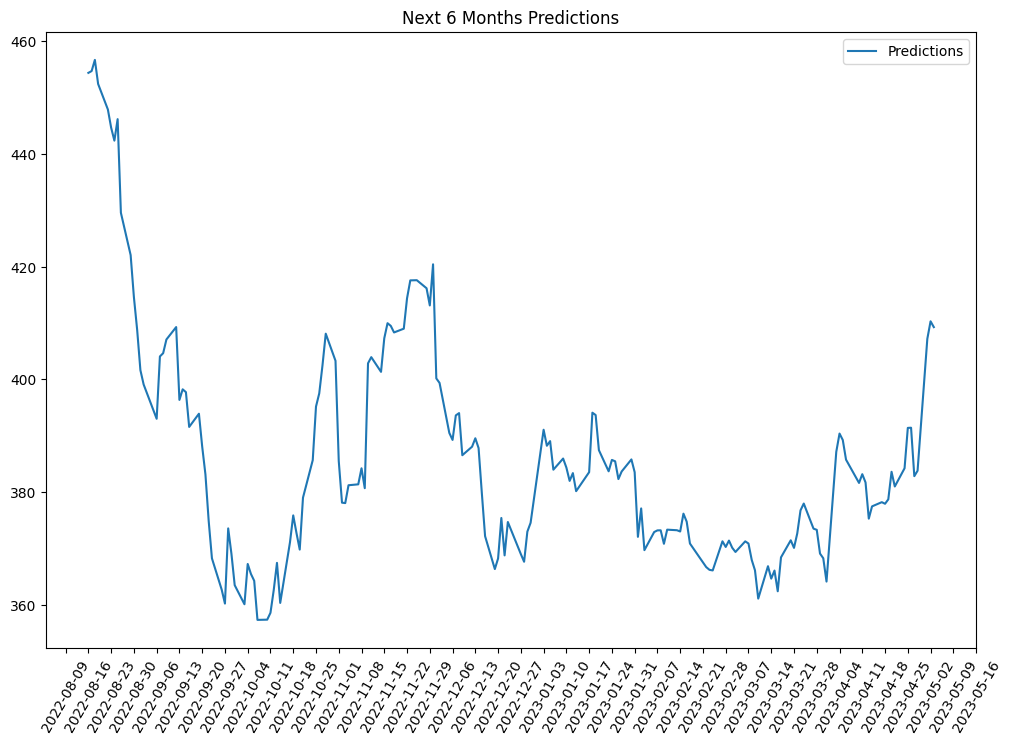

"Selected stocks: ['SPY']"

"Selected time range: ['3']"

127.0.0.1 - - [13/May/2023 19:51:59] "POST /demo HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:51:59] "POST /demo HTTP/1.1" 302 -
127.0.0.1 - - [13/May/2023 19:51:59] "GET /predictions HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:51:59] "GET /predictions HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:51:59] "GET /static/css/main.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:51:59] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:59] "GET /static/img/logo.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:51:59] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:59] "GET /static/js/functions-min.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:51:59] "GET /static/js/functions-min.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:51:59] "GET /%7B%20url_for('static',%20filename='img/SPY.png')%20%7D HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:51:59] "GET

Custom model: None
overwritten


127.0.0.1 - - [13/May/2023 19:53:44] "GET /predictions HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:53:44] "GET /predictions HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:53:44] "GET /static/css/main.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:53:44] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:53:44] "GET /static/img/logo.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:53:44] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:53:44] "GET /%7B%20url_for('static',%20filename='img/SPY.png')%20%7D HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:53:44] "GET /%7B%20url_for('static',%20filename='img/SPY.png')%20%7D HTTP/1.1" 404 -
127.0.0.1 - - [13/May/2023 19:53:44] "GET /static/js/functions-min.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:53:44] "GET /static/js/functions-min.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:53:44] "GET /static/img/introduction-vis

INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:56:55] "GET /static/css/fonts/Montserrat-Black.woff HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:56:55] "GET /static/css/fonts/Montserrat-Light.woff HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:56:55] "GET /static/css/fonts/Montserrat-Light.woff HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:57:26] "GET /predictions HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:57:26] "GET /predictions HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:57:27] "GET /static/css/main.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:57:27] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:57:27] "GET /static/img/logo.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:57:27] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 19:57:27] "GET /%7B%20url_for('static',%20filename='img/SPY.png')%20%7D HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 19:57:27] "GET /%7B%20

127.0.0.1 - - [13/May/2023 20:01:40] "GET /%7B%20url_for('static',%20filename='img/SPY.png')%20%7D HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:01:40] "GET /%7B%20url_for('static',%20filename='img/work-victory.jpg')%20%7D HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:01:40] "GET /%7B%20url_for('static',%20filename='img/SPY.png')%20%7D HTTP/1.1" 404 -
127.0.0.1 - - [13/May/2023 20:01:40] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:01:40] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 20:01:40] "GET /static/css/fonts/Montserrat-Regular.woff HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:01:40] "GET /static/css/fonts/Montserrat-Regular.woff HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 20:01:40] "GET /static/css/fonts/Montserrat-Bold.woff HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:01:40] "GET /static/css/fonts/Montserrat-Bold.woff HTTP/1.1" 

INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:03:11] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 20:03:11] "GET /static/img/logo.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:03:11] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 20:03:11] "GET /%7B%20url_for('static',%20filename='img/SPY.png')%20%7D HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:03:11] "GET /%7B%20url_for('static',%20filename='img/SPY.png')%20%7D HTTP/1.1" 404 -
127.0.0.1 - - [13/May/2023 20:03:11] "GET /static/js/functions-min.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:03:11] "GET /static/js/functions-min.js HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 20:03:11] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [13/May/2023 20:03:11] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
127.0.0.1 - - [13/May/2023 20:03:11] "GET /%7B%20url_for('static',%20filename='img/SPY.png')%20%7D HTTP

In [ ]:
app = Flask("Stock Predictions", static_folder='static')
app.config['TEMPLATES_AUTO_RELOAD'] = True
        
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predictions')
def predictions():
    return render_template('predictions.html')

@app.route('/demo', methods=['GET', 'POST'])
def demo():
    if request.method == 'POST':
        tickers = request.form.getlist('stock-name')
        time = request.form.getlist('time-name')
        toggle = request.form.get('model-name-toggle')
        layers = request.form.getlist('model-1')
        lr = request.form.getlist('model-2')
        early_stopping = request.form.getlist('model-3')
        epochs = request.form.getlist('model-4')

        if toggle is None:
            for ticker in tickers:
                # Still need to define time in lstm.py
                lstm = Lstm(ticker)
                lstm.predict()
                lstm.plot_preds()
        else:
            for ticker in tickers:
                lstm = Lstm(ticker)
                lstm.train_lstm(layers=layers, 
                                lr=lr, 
                                early_stopping=early_stopping, 
                                epochs=epochs,
                                save='Off')
                lstm.predict()
                lstm.plot_preds()

        display(f"Selected stocks: {tickers}")
        display(f"Selected time range: {time}")
        print(f"Custom model: {toggle}")
        if toggle is None:
            pass
        else:
            display(f"Number of LSTM layers: {layers}")
            display(f"Learning rate: {lr}")
            display(f"Early Stopping: {early_stopping}")
            display(f"Number of Epochs: {epochs}")

        #predictions_html_new = render_template(predictions_html)
        #return render_template('predictions.html')
        f = open('templates/predictions.html', 'w')
        f.write(Markup(render_predictions(tickers)))
        f.flush()
        f.close()
        print("overwritten")
        return redirect(url_for('predictions'))
    else:
        return render_template('demo.html')


if __name__ == '__main__':
    app.run(host='localhost', port=5001)